# Исследование объявлений о продаже квартир

# План проекта:

[Шаг 1. Описание данных](#step1)

[Шаг 2. Предобработка данных, определение и заполнение пропущенных значений.](#step2)

[Шаг 3. Добавление расчетных данных для анализа:](#step3)
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

[Шаг 4. Исследовательский анализ данных:](#step4)
- изучение параметров, визуализация, установление зависимостей между ценой и различными параметрами (площадь, число комнат, высота потолков, дата размещения)
- установление границ редких и выбивающихся значений, 
- анализ населенных пунктов с наибольшим числом объявлений
- исследовательский анализ для группы квартир в центре города, установление зависимости между ценой и удаленностью от центра

# Шаг 1. Описание данных. <a id='step1'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим на столбцы по порядку:
- **`total_images`** - количество фотографий - пропусков нет, тип **int64** данных соответствует содержанию, бесполезный для нашего исследования столбец. 
- **`last_price`** - общая цена - пропусков нет, тип данных **float64** можно округлить, поменяв тип на **int64**, нас будет интересовать в дальнейшем не общая цена, а цена за кв. метр,. Странные значения - минимальная цена 12 тыс, максимальная 763 млн.
- **`total_area`** - общая площадь, пропусков нет, тип данных соответствует содержанию, максимум 900 кв.метров - похоже есть какие-то неправдоподобные выбросы.
- **`first_day_exposition`** - дата размещения объявления - пропусков нет, тип данных **object**, нужно будет перевести в формат даты.
- **`rooms`** - число комнат - пропусков нет, тип данных соответствует содержанию, однако максимальное значение 19 комнат - это странно.
- **`ceiling_height`** - высота потолков - пропусков 39%, на следующем этапе нужно будет решить заполнять ли пропуски нормальными значениями и как их определить, тип данных соответствует содержанию. Максимум  высота потолков 100 метров, а минимум 1 метр - нужно будет избавляться от этих аномалий. 
- **`floors_total`** - число этажей в доме - пропусков почти нет, вещественный тип данных нужно изменить на целочисленный.
- **`living_area`** - жилая площадь, пропусков 8%, на следущем этапе можно будет заполнить характерными значениями в зависимости от типа жилья - студия или нет, колва комнат, общей площади, тип данных соответствует содержанию, тоже есть странные значения, судя по числовому описанию.
- **`floor`** - этаж - пропусков нет, тип данных соответствует содержанию
- **`is_apartment`** - апартаменты или нет - заполнено 2775 строк из 23699, можно считать это за 1 "да, апартаменты", пропуски заполнить нулями, изменив тип данных на булев, хотя в дальнейшем анализе не понадобится.
- **`studio`** - студия или нет - пропусков нет, тип данных соответствует содержанию
- **`open_plan`** - свободная планировка или нет - пропусков нет, тип данных соответствует содержанию - не важен для дальнейшего исследования
- **`kitchen_area`** - пропусков 9.6%, на следующем этапе определить в каких квартирах пропущены строки, например, если это студии, то площадь можно заменить 0. Кухни по 112 метров вряд ли существуют?
- **`balcony`** - число балконов - пропусков 48.6%, логично предположить, что если не заполнено, то балконов нет, но предварительно проверить по другим параметрам, вряд ли в квартире с 5 комнатами не будет ни одного балкона, тип данных заменить с вещесвенного на целочисленный. Но для дальнейшего исследования этот столбец нам вряд ли понадобится, поэтому делать это только при необходимости
- **`locality_name`** - название населенного пункта - пропусков почти нет, тип данных соответствует содержанию. Столбец участвует в дальнейшем анализе, его нужно будет проверить на дубликаты, возможно потребуется лемматизировать
- **`airports_nearest`** - расстояние до аэропорта - пропусков 23.4%, тип данных соответствует содержанию. Столбец не участвует в дальнейшем исследовании.
- **`cityCenters_nearest`** - расстояние до центра - пропусков более 23%, тип данных соответствует содержанию.
- **`parks_around3000`** - число парков в радиусе 3 км - пропусков тоже около 24%, тип данных нужно менять с вещественного на целочисленный.
- **`parks_nearest`** - расстояние до ближайшего парка - пропусков 23%, тип данных соответствует содержанию
- **`days_exposition`** - сколько дней висело объявление- пропусков больше 13%, тип данных менять с вещественного на целочисленный, далее нужно будет понять причину пропусков и что с ними делать. Есть объявление, которые висели только 1 день, а есть которые больше 4 лет. Нужно будет разбираться с этим.

ИТОГ: данные не самые лучшие, много пропусков, много не соответствий типов данных, есть странные значения, которые сильно выбиваются. Прежде, чем что-то делать с данными определим, какие столбцы помогут ответить на вопросы, если какие-то данные не нужны для исследования, то тратить время на их преобразование и предобработку не будем.


# Шаг 2. Предобработка данных <a id='step2'></a>

 Итак, определим какие столбцы понадобятся в нашем исследовании и проведем предобработку, если потребуется.

1) на следующем этапе нам нужнот будет добавить день недели, месяц и год публикации, поэтому на данном этапе редварительно в столбце **`first_day_exposition`** нужно изменить тип данных:

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

2) на следующем этапе нам потребуется определить категорию этажа. Пропущенные значения можно заменить на соответствующие значения из столбца **`floor`**, так как этажность здания точно будет не меньше, чем этаж в объявлении, а так как пропущенных значений очень мало, такая замена не повлияет на результат, и также в столбце **`floors_total`** изменим типа данных на целочисленный:

In [6]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [7]:
data['days_exposition']=data['days_exposition'].fillna(0)

Остальные пропуски оставим пока как есть. На этом этапе без дополнительного исследования заполнить их будет трудно. Например, высота потолков **`ceiling_height`** в Санкт-Петербурге очень зависит от расположения: в центральных районах много старого жилого фонда с нестандартными площадями, высотой потолков, поэтому просто заполнить пропуски средним или медианой в данной задаче, наверно, будет неправильным. Для заполнения картографических данных нужно анализировать **`locality_name`**, а предварительно его нужно проверить на наличие дубликатов, категоризировать. 
На этапе исследования мы лучше поймем характер и причину пропусков.

3) обработка пропусков в жилой площади

Чем больше комнат, тем больше жилая площадь, это понятно и без коэффициента корреляции. Коэффициент корреляции, подтверждает сильную зависимость. Попробуем заполнить жилую площадь по количеству комнат.

In [8]:
data['rooms'].corr(data['living_area'])

0.8459774567888746

In [9]:
data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))
data['living_area'].describe()

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

4) обработка пропусков площади кухни

Если тип жилья - студия, поставим площадь кухни равной нулю.
По остальным - медианой по количеству комнат (зависисомост не такая сильная как с жилой площадью, но тоже наблюдается).

In [10]:
# кухни студий = 0:
data.loc[(data['kitchen_area'].isnull()) & (data['studio']==True), 'kitchen_area'] = 0
# кухни не студий:
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.median()))
data['kitchen_area'].describe()

count    23699.000000
mean        10.371929
std          5.724779
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

5) обработка пропусков высоты потолков. 
Обычная высота потолков 2.65-2.75. Проверим, какая высота потолков в нашей выборке:

In [11]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [12]:
#заполним пропуски медианой высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

# Шаг 3. Добавление расчетных данных для анализа <a id='step3'></a>

Добавим расчетные столбцы - отношение жилой площади к общей, отношение площади кухни к общей.

In [13]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.283019,0.059748
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


Добавим столбец с ценой за квадратный метр **`price_for_meter`**:

In [14]:
data['price_for_meter'] = data['last_price']/data['total_area']
data['price_for_meter'] = data['price_for_meter'].astype('int')

Добавим столбцы День недели **`weekday`**, Месяц **`month`** и Год публикации **`year`**:

In [15]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец с категориями по этажам **`floor_category`** - первый, последний, другой по условиям: если значение столбца **`floor`** = 1, то "первый", если **`floor`** = **`floors_total`**, то "последний", иначе - "другой"

In [16]:
def category(columns):  
    floor = columns[0]
    floors_total = columns[1]
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_category'] = data[['floor','floors_total']].apply(category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_area_ratio,kitchen_area_ratio,price_for_meter,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,2.0,755.0,0.0,0.472222,0.231481,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,0.0,NaN,81.0,0.460396,0.272277,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,2.0,574.0,558.0,0.612500,0.148214,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,45.0,9,NaN,...,3.0,234.0,424.0,0.283019,0.059748,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,1.0,48.0,121.0,0.320000,0.410000,100000,1,6,2018,другой


Добавим столбцы с отношениями площадей - отношение жилой площади к общей **`living_area_ratio`** и отношение площади кухни к общей **`kitchen_area_ratio`**:

In [17]:
data[['living_area_ratio','kitchen_area_ratio']].describe()
#и средняя и медианаи отличаются не сильно, разброс небольшой

,living_area_ratio,kitchen_area_ratio
count,23699.000000,23699.000000
mean,0.563845,0.186482
std,0.110933,0.075764
min,0.021583,0.000000
25%,0.490326,0.133056
50%,0.566596,0.172131
75%,0.638298,0.232143
max,1.514286,0.787879


# Шаг 4. Исследовательский анализ данных <a id='step4'></a>

In [18]:
#функции для построения графиков
def hist(column):
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    data[column].plot(kind='hist',bins=30,range=(0,q3+3*iqr),legend=True,label=column)

def boxplot(column):
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    plt.ylim(0,q3+3*iqr)
    data[[column]].boxplot()

Изучим следующие параметры: площадь, цена, число комнат, высота потолков, время продажи. Найдем для каждого основные параметры методом describe(), построим гистограммы и и диаграммы размаха. А затем удалим редкие и выбивающиеся значения. 

## Площадь:

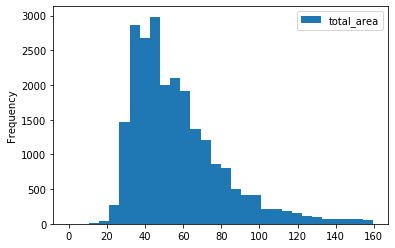

In [19]:
hist('total_area')

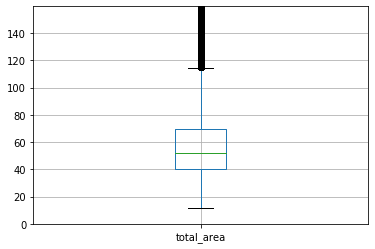

In [20]:
boxplot('total_area')

In [21]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Гистограмма распределения площадей близка к нормальной. Средняя площадь - 60 кв.метров, медиана - 52 кв.метра, есть неправдоподобно большие по площади квартиры. На основании графического и числового описания установим границы редких и выбивающихся значений: оставим для дальнейшего анализа квартиры площадью от 20 до 150 кв метров

## Цена за квадратный метр:

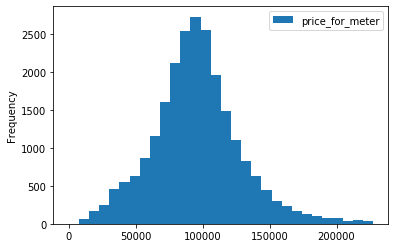

In [22]:
hist('price_for_meter')


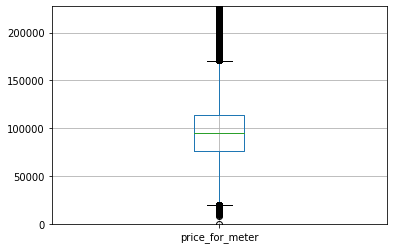

In [23]:
boxplot('price_for_meter')

In [24]:
data['price_for_meter'].describe()

count    2.369900e+04
mean     9.942121e+04
std      5.030681e+04
min      1.110000e+02
25%      7.658500e+04
50%      9.500000e+04
75%      1.142560e+05
max      1.907500e+06
Name: price_for_meter, dtype: float64

Гистограмма выглядит нормальной, по числовому описанию среднее значение незначительно отличается от медианы, однако есть редкие выбивающиеся значения, что подтвержадет большое значение стандартного отклонения.
По графикам и числовому описанию установим границы: 30 тыс - 200 тыс, цены ниже 30 тыс - редки неправдоподобны, выше 200 тыс - редки.

## Число комнат:

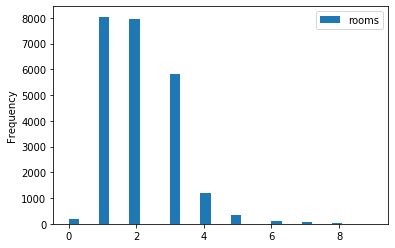

In [25]:
hist('rooms') 

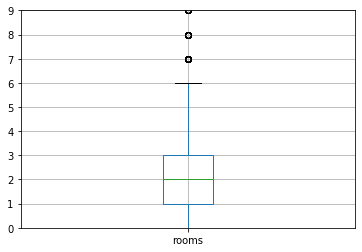

In [26]:
boxplot('rooms')

In [27]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Оставим для дальнейшего анализа квартиры с числом комнат не более 5, более 5 комнат - очень редкие значения.

## Высота потолков:

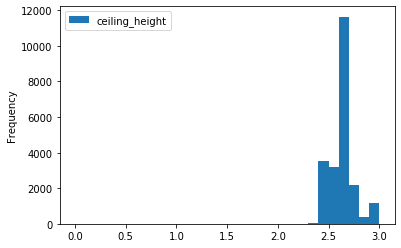

In [28]:
hist('ceiling_height')

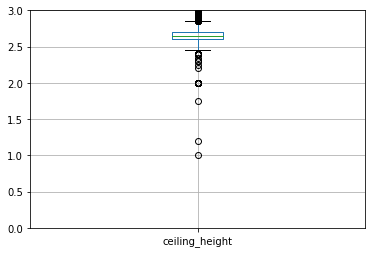

In [29]:
boxplot('ceiling_height')

In [30]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

На основании анализа графиков и числового описания параметра оставим потолки: от 2.4 метра до 3 

## Время продажи квартиры:

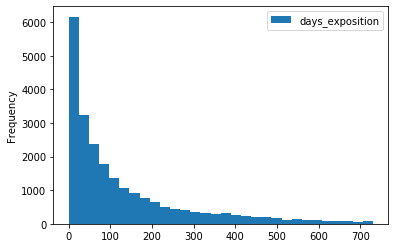

In [31]:
hist('days_exposition')

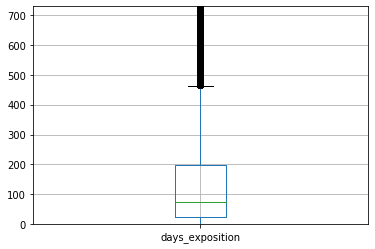

In [32]:
boxplot('days_exposition') 

In [33]:
data['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение времени продажи - 180 дней, медиана - 95 дней, стандартное отклонение - 219, это говорит о неоднородности данных. Есть очень короткие продажи в несколько дней, и достаточно много объявлений, которые висели не один год. Это подозрительно. 

##### Итак, обобщим, что получилось на данном этапе и избавимся от выбросов:
- **`total_area`** - оставляем квартиры площадью не более 150 кв. метров и не менее 20 кв метров, обрубив хвост в этом показателе в **`living_area`** и **`kitchen_area`** хвосты тоже обрубятся, так как эти площади напряму зависят от общей.
- **`price_for_meter`** - цену за квадратный метр оставим в диапазоне 30 тыс - 200 тыс, цены ниже 30 тыс - редки и неправдоподобны, выше 200 тыс - редки.
- **`rooms`** - оставим квартиры с числом комнат не более 5, остальные достаточно редки
- **`ceiling_height`** - оставим в диапазоне от 2.4 м (ниже не строили даже хрущевки) до 3 метров (выше уже только соборы и дворцы)
- **`days_exposition`** - оставим диапазон времени продаж от как мимнимум 3 дня до 2 лет, 


In [34]:
data = data.query('(total_area < = 150)&(total_area>=20)')
data = data.query('(price_for_meter >= 30000)&(price_for_meter <= 200000)')
data = data.query('rooms <= 5')
data = data.query('(ceiling_height >= 2.4)&(ceiling_height <= 3)')
data = data.query('(days_exposition <= 730)&(days_exposition >=3)')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17844 entries, 1 to 23697
Data columns (total 29 columns):
total_images            17844 non-null int64
last_price              17844 non-null float64
total_area              17844 non-null float64
first_day_exposition    17844 non-null datetime64[ns]
rooms                   17844 non-null int64
ceiling_height          17844 non-null float64
floors_total            17844 non-null int64
living_area             17844 non-null float64
floor                   17844 non-null int64
is_apartment            2140 non-null object
studio                  17844 non-null bool
open_plan               17844 non-null bool
kitchen_area            17844 non-null float64
balcony                 9902 non-null float64
locality_name           17803 non-null object
airports_nearest        13757 non-null float64
cityCenters_nearest     13775 non-null float64
parks_around3000        13775 non-null float64
parks_nearest           5566 non-null float64
ponds_arou

## Факторы, влияющие на стоимость квартиры

Далее изучим, какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

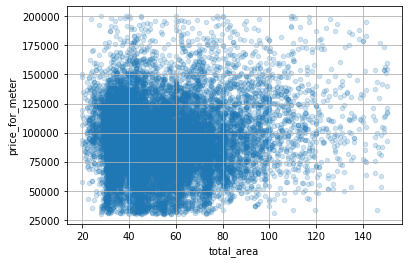

In [35]:
#зависимость цена-площадь
data.plot(x='total_area',y='price_for_meter', grid=True, kind='scatter',alpha=0.2)

In [36]:
data['price_for_meter'].corr(data['total_area'])

0.05269890816776842

И по диаграмме рассеяния и исходя их значения коэффициента корреляции - связи между площадью и ценой за квадратный метр нет. Хотя по моему опыту чем меньше квартира, тем дороже квадратный метр.

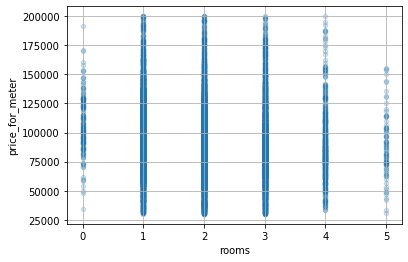

In [37]:
#зависимость цена-количество комнат
data.plot(x='rooms',y='price_for_meter', grid=True, kind='scatter',alpha=0.2)

In [38]:
data['price_for_meter'].corr(data['rooms'])

-0.15220960530317584

Коэффициент корреляции близок к 0 - цена не зависит от количества комнат. 

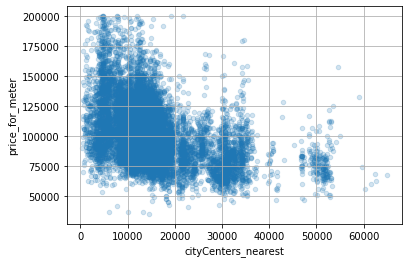

In [39]:
#Зависмость цена-удаленность от центра
data.plot(x='cityCenters_nearest',y='price_for_meter', grid=True, kind='scatter',alpha=0.2)

In [40]:
data['price_for_meter'].corr(data['cityCenters_nearest'])

-0.40716529932467943

Чем дальше от центра - тем ниже цена. Обратная зависимость есть, но не очень сильная.

Матрица корреляций анализируемых параметров</font>

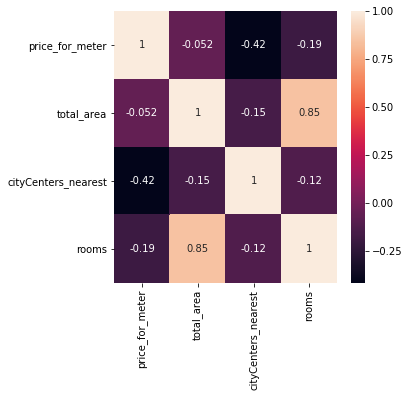

In [41]:
parameters = data[['price_for_meter','total_area','cityCenters_nearest','rooms']]
plt.figure(figsize = (5,5))
sns.heatmap(parameters.corr(method='spearman'),annot=True)

### Зависимость цена-этаж

In [43]:
#автоматизация сводок и графиков
def pivot_table(column):
    return data.pivot_table(index=column, values='price_for_meter',aggfunc=['count', 'median'])
def plot_bar(column):
    data.pivot_table(index=column, values='price_for_meter',aggfunc='median').plot(kind='bar')

In [44]:
pivot_table('floor_category')

,count,median
,price_for_meter,price_for_meter
floor_category,,
другой,13402,96226
первый,2098,80436
последний,2344,87260


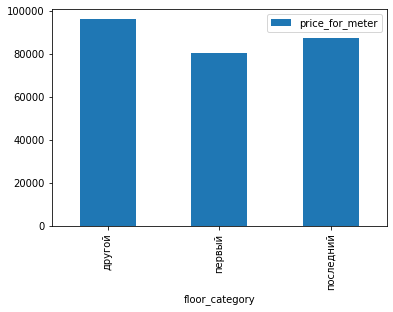

In [45]:
plot_bar('floor_category')

Цена за квадратный метр квартир на первом этаже в среднем ниже, чем на любом другом. Самые высокие цены на средних этажах.

### Зависимость цена-день размещения объявления

In [46]:
#зависимость цена-день размещения объявления
pivot_table('weekday')

,count,median
,price_for_meter,price_for_meter
weekday,,
0,2673,92857
1,3152,93209
2,2939,93659
3,3211,93589
4,3114,92999
5,1455,92559
6,1300,92643


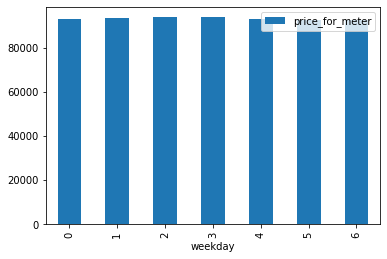

In [47]:
plot_bar('weekday')

Цена за квадратный метр не зависит, в какой день разместили объявление. Зависимость только одна - по выходным объявлений размещается почти в два раза меньше, чем в любой другой день.

### Зависмость цена-месяц

In [48]:
#зависимость цена-месяц
pivot_table('month')

,count,median
,price_for_meter,price_for_meter
month,,
1,1122,94314
2,1980,93221
3,1688,93750
4,1341,92391
5,990,91587
6,1450,91194
7,1357,93198
8,1422,95000


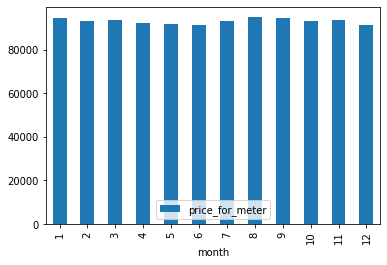

In [49]:
plot_bar('month')

Наблюдается небольшое снижение с апреля по июль и в декабре, в августе, январе-марте цены в среднем чуть выше.

In [50]:
#зависимость цена-год
pivot_table('year')
#data.pivot_table(index='year', values='price_for_meter', aggfunc=['count', 'median'])

,count,median
,price_for_meter,price_for_meter
year,,
2014,30,95868
2015,634,89932
2016,2179,90384
2017,7133,91346
2018,6879,95014
2019,989,102857


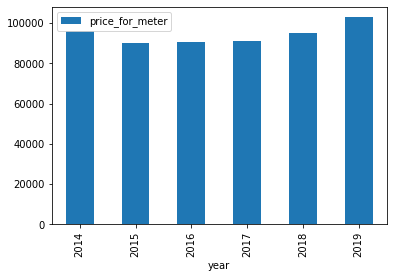

In [240]:
plot_bar('year')

А вот здесь прослеживается зависимость с кризисом 2014 года, во время которого снизился спрос, и упали цены на недвижимость.

## Топ-10 населенных пунктов по количеству объявлений

На данном этапе выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. Анализ будет проводиться на основании столбца **`locality_name`**, предварительно выделим названия населенных пунктов без вспомогательных слов.

In [51]:
data['locality_name'] = data['locality_name'].astype('str')
data['locality_name'].value_counts()


Санкт-Петербург                      11684
посёлок Мурино                         497
посёлок Шушары                         395
Всеволожск                             321
посёлок Парголово                      294
                                     ...  
поселок Семиозерье                       1
посёлок Пансионат Зелёный Бор            1
Подпорожье                               1
деревня Большое Рейзино                  1
посёлок городского типа Кузнечное        1
Name: locality_name, Length: 264, dtype: int64

In [52]:
from pymystem3 import Mystem
m = Mystem()
join_locality_name = ' '.join(data['locality_name'])
join_lemmas = m.lemmatize(join_locality_name)
from collections import Counter
print(Counter(join_lemmas))

Counter({' ': 21913, 'санкт-петербург': 11684, 'поселок': 2155, 'деревня': 741, 'муриный': 531, 'кудрово': 399, 'шушар': 395, 'городской': 390, 'всеволожск': 321, 'парголовый': 294, 'колпино': 293, 'пушкин': 275, 'тип': 256, 'гатчина': 246, 'выборг': 187, 'село': 170, 'петергоф': 162, 'красный': 155, 'сестрорецк': 150, 'новый': 149, 'девяткино': 121, 'сертолово': 115, 'ломоносов': 106, 'бугор': 96, 'кингисепп': 94, 'тосно': 91, 'кириши': 81, 'кронштадт': 79, 'сосновый': 79, 'бор': 77, 'никольское': 72, '-': 71, 'волхов': 71, 'кировск': 69, 'коммунар': 66, 'старый': 63, 'янино': 56, '1': 56, 'металлострой': 56, 'отрадный': 52, 'имя': 46, 'приозерск': 45, 'шлиссельбург': 43, 'nan': 41, 'стрельна': 38, 'тихвин': 37, 'луг': 36, 'свердлов': 34, 'рощино': 33, 'тельман': 33, 'романовка': 32, 'павловск': 27, 'волосово': 26, 'кузьмоловский': 25, 'большой': 25, 'мга': 25, 'новоселье': 24, 'сиверский': 21, 'кудровый': 21, 'малый': 21, 'щегловый': 21, 'новогорелово': 20, 'зеленогорск': 19, 'вартем

Выделип топ-10 самых часто встречающихся населенных пунктов: 
- Санкт-Петербург
- Мурино
- Кудрово
- Шушары
- Всеволожск
- Колпино
- Парголово
- Пушкин
- Гатчина
- Петергоф

In [53]:
#укрупняем группы, будут топ-10 населнных пунктов, остальные - в группе другие
top_locality_name = ['Санкт-Петербург','Мурино','Кудрово','Шушары','Всеволожск','Колпино','Парголово', 'Пушкин','Гатчина','Петергоф']
def category(row):
    for element in top_locality_name:
        index = row.find(element)
        if index != -1:
            return element
    return 'другой'

data['top_locality_name'] = data['locality_name'].apply(category)
data[['locality_name','top_locality_name']].head(3)

,locality_name,top_locality_name
1,посёлок Шушары,Шушары
2,Санкт-Петербург,Санкт-Петербург
5,городской посёлок Янино-1,другой


Построим сводную таблицу  по топ-10 + остальные в общей группе:

In [54]:
data.pivot_table(index=['top_locality_name'], values='price_for_meter', aggfunc='mean').sort_values('price_for_meter',ascending=False)


,price_for_meter
top_locality_name,
Санкт-Петербург,105692.802550
Пушкин,100271.385455
Кудрово,94582.300000
Парголово,89489.826531
Мурино,85806.114878
Петергоф,82551.296296
Шушары,77910.772152
Колпино,74786.931741
Гатчина,68756.345528


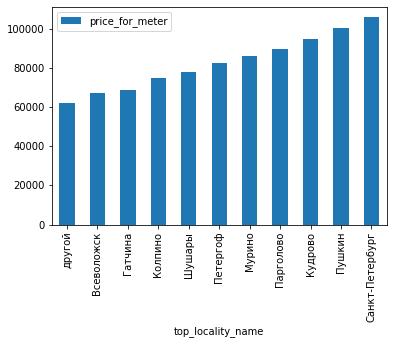

In [55]:
data.pivot_table(index=['top_locality_name'], values='price_for_meter',aggfunc='mean').sort_values('price_for_meter').plot(kind='bar')

Самая высокая стоимость жилья в черте города Санкт-Петербург, Пушкин (хотя Пушкин и входит в состав Санкт-Петербурга, но здесь выделен как отдельный город), Кудрово. Самая низкая цена во городах Всеволжск и Гатчина Ленинградской области.

## Анализ объявлений в центре города

Выделим квартиры в Санкт-Петербург и попытаемся понять, что входит в понятие "центр города"

In [56]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

# пустых значений по cityCenters_nearest всего 18, можно удалить
data_spb = data_spb.dropna(subset=['cityCenters_nearest'])
data_spb['cityCenters_nearest_spb'] = data_spb[['cityCenters_nearest']]/1000
data_spb['cityCenters_nearest_spb']=data_spb['cityCenters_nearest_spb'].astype('int')
data_spb.head(3)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,living_area_ratio,kitchen_area_ratio,price_for_meter,weekday,month,year,floor_category,top_locality_name,cityCenters_nearest_spb
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,558.0,0.612500,0.148214,92785,3,8,2015,другой,Санкт-Петербург,13
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,289.0,0.714754,0.106557,88524,6,2,2017,другой,Санкт-Петербург,15
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,137.0,0.512626,0.214646,127525,3,11,2017,другой,Санкт-Петербург,13


Количество объявлений с удаленностью от центра более 25 километров очень мало, по 2-3 объявления. Такая маленькая выборка вряд ли покажет верную картину по ценам. Можно либо укрупнить группы либо не брать их в дальнейшем исследовании.

In [57]:
data_spb = data_spb.query('cityCenters_nearest_spb < 26')

In [58]:
data_spb['price_for_meter'].corr(data_spb['cityCenters_nearest_spb'])

-0.3214733839834672

не очень сильная зависимость -чем дальше от центра тем дешевле -сохранилась как и в исходной выборке.

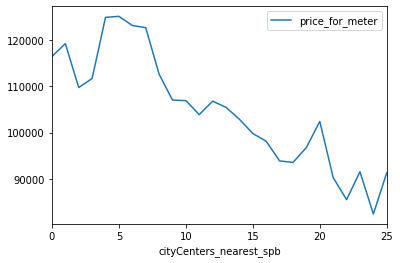

In [59]:
data_spb.pivot_table(index=['cityCenters_nearest_spb'], values='price_for_meter',aggfunc='mean').plot()

Наблюдается резкое падение вниз на 9 километре.

Выделим сегмент квартир в центре и проанализируем параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [60]:
data_spb_center = data_spb.query('cityCenters_nearest_spb < 10')

Сравним Центр города со всем городом:

In [61]:
#density=True
def comp_of_corr(column):
    ax = data_spb[column].plot(kind='hist', histtype='step', bins=25, linewidth=5, alpha=0.7, label='SPB')
    data_spb_center[column].plot(kind='hist', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Center', ax=ax, grid=True, legend=True)

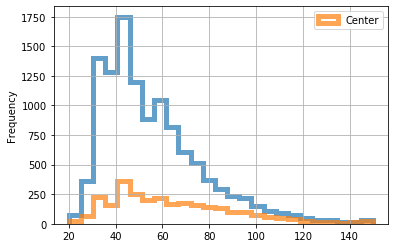

In [62]:
comp_of_corr('total_area')

In [63]:
data_spb['total_area'].describe()

count    11655.000000
mean        55.557526
std         21.564062
min         20.000000
25%         40.000000
50%         50.000000
75%         66.000000
max        150.000000
Name: total_area, dtype: float64

In [64]:
data_spb_center['total_area'].describe()

count    2794.000000
mean       64.385966
std        26.217726
min        20.000000
25%        44.000000
50%        59.000000
75%        80.300000
max       150.000000
Name: total_area, dtype: float64

В этой выборке квартиры в среднем больше по площади, чем в общей изначальной таблице, например, медиана составляла 50 кв.метра, а в центре составляет 59 кв.метров

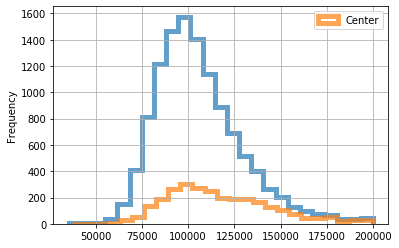

In [65]:
comp_of_corr('price_for_meter')

In [66]:
data_spb_center['price_for_meter'].describe()

count      2794.000000
mean     117098.152827
std       28275.134464
min       37234.000000
25%       96153.000000
50%      112322.000000
75%      134962.500000
max      200000.000000
Name: price_for_meter, dtype: float64

In [67]:
#а как в целом по городу:
data_spb['price_for_meter'].describe()

count     11655.000000
mean     105712.279794
std       23442.665398
min       35384.000000
25%       89302.500000
50%      101851.000000
75%      117924.500000
max      200000.000000
Name: price_for_meter, dtype: float64

Цены в центре города выше, чем в целом по городу.

Число комнат:

In [68]:
data_spb_center['rooms'].describe()

count    2794.000000
mean        2.210451
std         0.987617
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

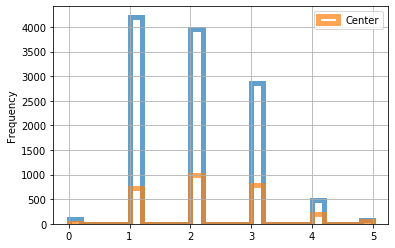

In [69]:
comp_of_corr('rooms')

По числу комнат: в центре самый часто встречающийся вариант - 2хкомнатные квавртиры, в целом по городу однокомнатных больше, хотя и двухкомнатные очень часты вариант.

Высота потолков:

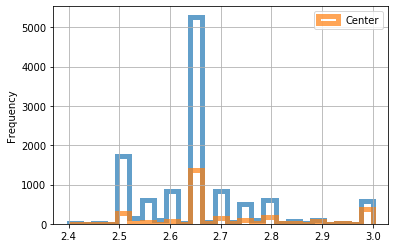

In [70]:
comp_of_corr('ceiling_height')

In [71]:
data_spb_center['ceiling_height'].describe()

count    2794.000000
mean        2.707258
std         0.144681
min         2.400000
25%         2.650000
50%         2.650000
75%         2.770000
max         3.000000
Name: ceiling_height, dtype: float64

In [72]:
data_spb['ceiling_height'].describe()

count    11655.000000
mean         2.655733
std          0.115854
min          2.400000
25%          2.600000
50%          2.650000
75%          2.680000
max          3.000000
Name: ceiling_height, dtype: float64

По высоте потолков немного средняя повысилась - все-таки в центре СПб больше квартир с нестандартной высотой потолков. Но в среднем потолки высотой 2,65 м как и везде.

Оценим зависимость цены от разных параметров:

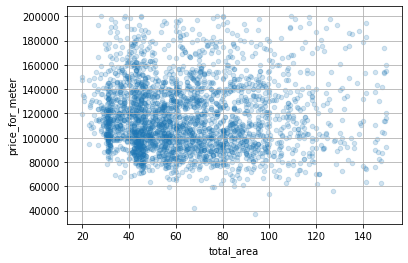

In [73]:
#зависимость цена-площадь
data_spb_center.plot(x='total_area',y='price_for_meter', grid=True, kind='scatter',alpha=0.2)

In [74]:
data_spb_center['price_for_meter'].corr(data_spb_center['total_area'])

-0.02095965357871932

Зависимсоть почти нулевая, еще меньше чем в исходной выборке.

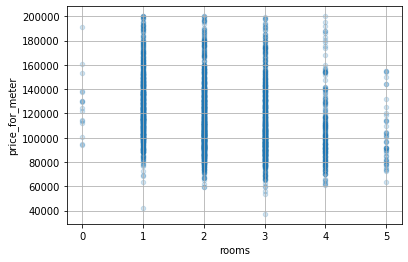

In [75]:
#зависимость цена-число комнат
data_spb_center.plot(x='rooms',y='price_for_meter', grid=True, kind='scatter',alpha=0.2)

In [76]:
data_spb_center['price_for_meter'].corr(data_spb_center['rooms'])

-0.2368554377764625

Зависимость, что в однокомнатной квартире квадратный метр стоит дороже, чем в многкомнтаной квартире есть, но слабая.

In [77]:
#зависимость цена-удаленность от центра
data_spb_center['price_for_meter'].corr(data_spb_center['cityCenters_nearest_spb'])

-0.12042948529041664

Так как эта выборка квартир одном районе, 1-2 километра роли не играют, цена зависит уже от другого, поэтому и коээфициент корреляции ниже, чем в целом по городу.

In [78]:
#сравнение на графике результатов в центре с результатами в целом по городу
def comp_of_results(column):
    ax = data_spb.pivot_table(index=column, values='price_for_meter', aggfunc='median').plot(color='r',linewidth=5)
    data_spb_center.pivot_table(index=column, values='price_for_meter', aggfunc='median').plot(ax=ax, grid=True,linewidth=5, title = 'Цена за кв метр по городу и в центре')
def pivot_table_center(column):
    return data_spb_center.pivot_table(index=column, values='price_for_meter', aggfunc=['count', 'median'])

In [79]:
#зависимость цена-этаж
pivot_table_center('floor_category')

,count,median
,price_for_meter,price_for_meter
floor_category,,
другой,2041,115625
первый,313,100000
последний,440,106250


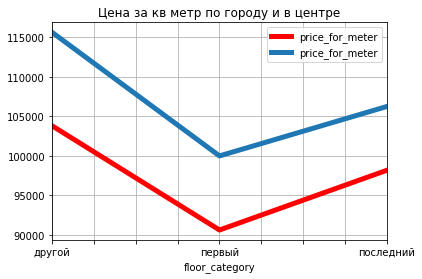

In [80]:
comp_of_results('floor_category')

В среднем цена выше в центре. Прослеживается такая же зависимость что и в целом по городу - метр на первом этаже стоит дешевле.

In [81]:
#зависимость цена-день размещения объявления
pivot_table_center('weekday')

,count,median
,price_for_meter,price_for_meter
weekday,,
0,417,115384.0
1,487,110551.0
2,444,112769.5
3,551,113240.0
4,486,109836.0
5,226,116827.0
6,183,111926.0


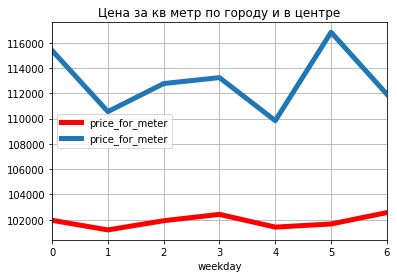

In [82]:
comp_of_results('weekday')

В центре по субботам квартиры немного дороже - вряд ли это можно утверждать, скорее всего это просто совпадение.

In [83]:
#зависимость цена-месяц
pivot_table_center('month')

,count,median
,price_for_meter,price_for_meter
month,,
1,171,112820.0
2,306,111192.0
3,266,121390.0
4,229,108518.0
5,169,104838.0
6,236,110862.5
7,217,110638.0
8,226,121062.5


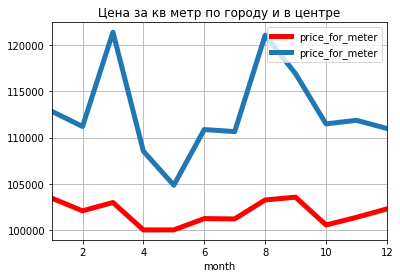

In [84]:
comp_of_results('month')

Сезонность также присутствует, и даже более ярко выраженная, чем в целом по городу. Можно выделить самый низкий сезон продаж - апрель, май, июнь, высокие сезоны - март, август.

In [85]:
#зависимость цена-год
data_spb_center.pivot_table(index='year', values='price_for_meter', aggfunc=['count', 'median'])

,count,median
,price_for_meter,price_for_meter
year,,
2014,7,113750.0
2015,130,104257.0
2016,381,106557.0
2017,1140,111318.5
2018,983,115000.0
2019,153,121666.0


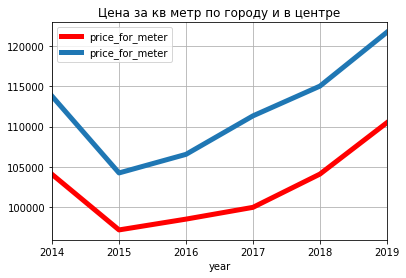

In [86]:
comp_of_results('year')

Средняя цена в центре города выше, чем в целом по городу.
Зависимость от года размещения осталась прежней: падение цен после кризиса 2014 года, постепенное восстановление и рост рынка недвижимости в последующие годы. 

### Шаг 5. Общий вывод

Мы проанализировали исходные данные: архив объявлений о продаже квартир. Провели предобработку данных там, где это было возможно и необходимо. Установили границы редких и выбивающихся значений на основе числовых и графичесских ислледований (нам встречались квартиры площадью более 500 кв метров и высотой потолков 100 метров - от таких и подобных аномалий мы избавились), исследовали зависимость цены за квадратный метр от различных параметров. Установили, например, что цена зависит от удаленности от центра, хотя есть высокие значения и далеко от центра - наверное удобство элитных новостроек не менее важно, чем престижность  центра - поэтому коэффициент корреляции хоть и показал связь, но не очень большую.
Также мы установили, что рынку недвижимости присуща сезонность, и четко увидели влияние кризиса на цены и спрос.